In [43]:
!pip install contractions

In [44]:
!wget https://raw.githubusercontent.com/miricoder/NLP/dev/helper_functions.py

--2023-08-05 23:21:20--  https://raw.githubusercontent.com/miricoder/NLP/dev/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-05 23:21:20 (71.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [45]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)
# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns
# Helps to display the images
from PIL import Image
# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Helped to create train and test data
from sklearn.model_selection import train_test_split
# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Used to create the Sequential model
from keras.models import Sequential
import tensorflow
# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer
# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import io
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
# All helper Functions user for Plotting and etc... are collected and collected and imported
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ✅ <b> Data Sanity Check and  Clean up
1. Read the dataset
2. Check the shape of the data
3. Check the missing values
4. Keep only the columns needed

In [48]:
import pandas as pd
tweets=pd.read_csv('https://raw.githubusercontent.com/miricoder/NLP/dev/Tweets.csv')

In [49]:
tweets.shape

(14640, 15)

In [50]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


* There're 3  sentiment classes: negative/neutral/positive

In [51]:
# Making a safe copy
data = tweets.copy()

In [52]:
# Keeping only the columns that we need
data = data.loc[:14640,['airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline',
                'airline_sentiment_gold','name','negativereason_gold','text']]

In [53]:
data.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'text'],
      dtype='object')

In [54]:
# Checking for null values in the data
data.isnull().sum(axis=0)

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
text                                0
dtype: int64

* negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold have a lot of Null values

In [55]:
data.duplicated().sum()

38

In [56]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica and it's a really big bad thing about it


# ✅ <b> Data Pre - Processing the text data for classification
1. Html tag removal.
2. Tokenization.
3. Remove the numbers.
4. Removal of Special Characters and Punctuations.
5. Removal of stopwords
6. Conversion to lowercase.
7. Lemmatize or stemming.
8. Join the words in the list to convert them back to text string in the data frame. - Print the first 5 rows of data after pre-processing.

**NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [57]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data['airline'] = data['airline'].apply(lambda x: strip_html(x))
data['name'] = data['name'].apply(lambda x: strip_html(x))

data.head()

<ipython-input-57-68c047f16d96>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica and it's a really big bad thing about it


In [58]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data['airline'] = data['airline'].apply(lambda x: replace_contractions(x))
data['name'] = data['name'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica and it is a really big bad thing about it


In [59]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data['airline'] = data['airline'].apply(lambda x: remove_numbers(x))
data['name'] = data['name'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,@VirginAmerica and it is a really big bad thing about it


In [60]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data['airline'] = data.apply(lambda row: nltk.word_tokenize(row['airline']), axis=1) # Tokenization of data
data['name'] = data.apply(lambda row: nltk.word_tokenize(row['name']), axis=1) # Tokenization of data

In [61]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,"[Virgin, America]",NaN,[cairdin],NaN,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,0.3486,NaN,0.0000,"[Virgin, America]",NaN,[jnardino],NaN,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,0.6837,NaN,NaN,"[Virgin, America]",NaN,[yvonnalynn],NaN,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,1.0000,Bad Flight,0.7033,"[Virgin, America]",NaN,[jnardino],NaN,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,1.0000,Can't Tell,1.0000,"[Virgin, America]",NaN,[jnardino],NaN,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [62]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

In [69]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def removing_AllnonLetters(words):
    """Replace all non-letters with spaces"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^a-zA-Z]', '', " ",str(word))
        if new_word != '':
            new_words.append(new_word)
    return new_words

    # letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
    #                       " ",          # Replace all non-letters with spaces
    #                       str(location))

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data['airline'] = data.apply(lambda row: normalize(row['airline']), axis=1)
data['name'] = data.apply(lambda row: normalize(row['name']), axis=1)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,v r g n e r c,NaN,c r n,NaN,v r g n e r c h e p b u r n
1,positive,0.3486,NaN,0.0000,v r g n e r c,NaN,j n r n,NaN,v r g n e r c p l u c e r c l e x p e r e n c e c k
2,neutral,0.6837,NaN,NaN,v r g n e r c,NaN,v n n l n n,NaN,v r g n e r c n u e n n e e k e n h e r r p
3,negative,1.0000,Bad Flight,0.7033,v r g n e r c,NaN,j n r n,NaN,v r g n e r c r e l l g g r e v e b l b n x u e n e r n e n g u e f c e l l e r e c u r e
4,negative,1.0000,Can't Tell,1.0000,v r g n e r c,NaN,j n r n,NaN,v r g n e r c r e l l b g b h n g


##### **Word Cloud based on Summary and Score**

In [70]:
# Move to Python File
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title, parameter):
    text = ' '.join(data[parameter].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

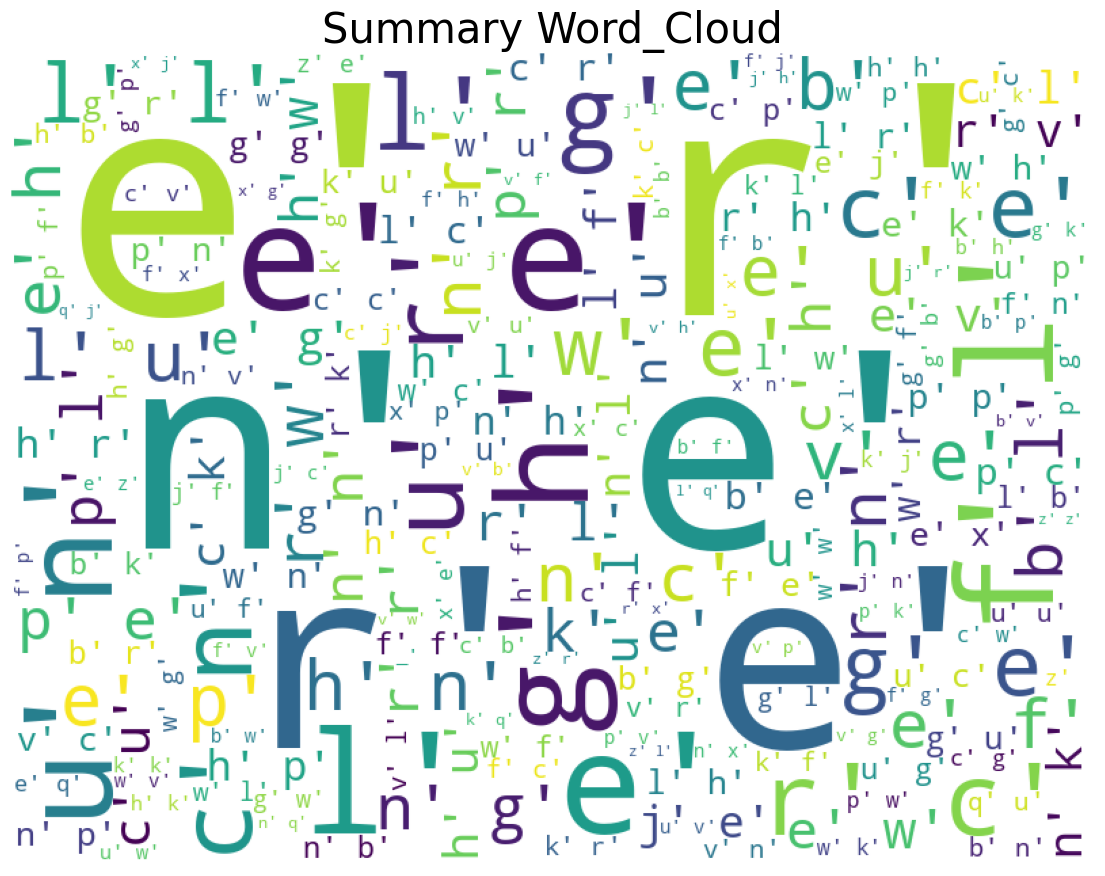

In [72]:
show_wordcloud(data,title='Text Word_Cloud',parameter='text')